In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [3]:
df = pd.read_csv('IQRSanitizedcopy.csv')
#df = pd.read_csv('IQRSanitizedcopy.csv', error_bad_lines=False)

In [4]:
df

,Unnamed: 0,ID,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Turbo,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags
0,0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,NaN,186005,6,Automatic,Front-Rear,4-5,Left wheel,Silver,12
1,1,44731507,16621,1018,CHEVROLET,EQUINOX,2011,Jeep,No,Petrol,3.0,NaN,192000,6,Tiptronic,Front-Rear,4-5,Left wheel,Black,8
2,2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,NaN,200000,4,Variator,Front,4-5,Right-hand drive,Black,2
3,3,45769185,3607,862,FORD,ESCAPE,2011,Jeep,Yes,Hybrid,2.5,NaN,168966,4,Automatic,Front-Rear,4-5,Left wheel,White,0
4,4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,NaN,91901,4,Automatic,Front,4-5,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18159,19232,45798355,8467,0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,Turbo,300000,4,Manual,Rear,2-3,Left wheel,Silver,5
18160,19233,45778856,15681,831,HYUNDAI,SONATA,2011,Sedan,Yes,Petrol,2.4,NaN,161600,4,Tiptronic,Front,4-5,Left wheel,Red,8
18161,19234,45804997,26108,836,HYUNDAI,TUCSON,2010,Jeep,Yes,Diesel,2.0,NaN,116365,4,Automatic,Front,4-5,Left wheel,Grey,4
18162,19235,45793526,5331,1288,CHEVROLET,CAPTIVA,2007,Jeep,Yes,Diesel,2.0,NaN,51258,4,Automatic,Front,4-5,Left wheel,Black,4


In [5]:
df_prices = df.groupby("Color").agg([np.mean, np.std])
df_prices.head()

/var/folders/nb/s8fktsw52p56v1_88xgvdtsm0000gq/T/ipykernel_16012/2370503817.py:1: FutureWarning: ['Manufacturer', 'Model', 'Category', 'Leather_interior', 'Fuel_type', 'Turbo', 'Gear_box_type', 'Drive_wheels', 'Doors', 'Wheel'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_prices = df.groupby("Color").agg([np.mean, np.std])


Unnamed: 0                         ID                \
                       mean          std          mean           std   
Color                                                                  
Beige           9760.307692  5707.530084  4.543510e+07  1.259093e+06   
Black           9586.510354  5603.891019  4.558549e+07  9.239521e+05   
Blue            9776.226727  5552.474732  4.555324e+07  1.043842e+06   
Brown          10008.447059  5522.369357  4.550822e+07  7.671393e+05   
Carnelian red   9569.102857  5380.551169  4.545770e+07  9.768428e+05   

                      Price                      Levy              \
                       mean           std        mean         std   
Color                                                               
Beige          14301.523077  10107.383725  288.292308  501.325305   
Black          14058.106773  12269.449298  691.479724  608.327492   
Blue           12622.125375  11203.687577  517.400150  523.315354   
Brown          14815.535294  12112.339934  566.588235  496.673772   
Carnelian red  14537.434286   8857.027367  364.525714  447.123974   

                 Prod_year           Engine_volume                 Mileage  \
                      mean       std          mean       std          mean   
Color                                                                        
Beige          2006.738462  8.138866      2.161538  0.774635  6.115693e+06   
Black          2011.085850  5.054009      2.524051  0.956327  2.356218e+06   
Blue           2009.161411  6.792641      2.103378  0.719553  3.405614e+06   
Brown          2011.317647  5.905993      2.225294  0.879891  1.658050e+05   
Carnelian red  2008.834286  6.905851      2.038857  0.619862  5.849292e+06   

                            Cylinders             Airbags            
                        std      mean       std      mean       std  
Color                                                                
Beige          6.820396e+07  4.538462  1.142239  5.707692  4.006673  
Black          6.397598e+07  4.842321  1.339286  7.188525  4.583052  
Blue           8.319021e+07  4.417417  1.058725  6.316817  4.359528  
Brown          5.923380e+05  4.564706  1.087281  7.035294  4.422768  
Carnelian red  7.558272e+07  4.280000  0.992153  7.342857  3.975087

In [6]:
prices = df_prices['Price']
print(prices)

                       mean           std
Color                                    
Beige          14301.523077  10107.383725
Black          14058.106773  12269.449298
Blue           12622.125375  11203.687577
Brown          14815.535294  12112.339934
Carnelian red  14537.434286   8857.027367
Golden         13553.595745   7978.055059
Green           8997.309375   8457.379599
Grey           15419.260118  12199.171898
Orange         11577.012048   5479.572008
Pink            8967.560000   6887.070604
Purple          8837.384615   7309.131789
Red            12285.958266  10455.800733
Silver         13795.464373  10012.892515
Sky blue       13762.520661   8474.381357
White          14678.975569  11820.459739
Yellow         16154.175258   8649.207496


<AxesSubplot:title={'center':'Mean Prices'}, ylabel='Color'>

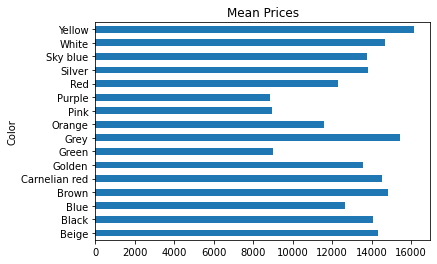

In [7]:
prices.plot(kind = "barh", y = "mean", legend = False,title = "Mean Prices")

In [9]:
print(df.Color.unique())

['Silver' 'Black' 'White' 'Grey' 'Blue' 'Green' 'Sky blue' 'Red' 'Orange'
 'Yellow' 'Brown' 'Golden' 'Beige' 'Carnelian red' 'Purple' 'Pink']


In [10]:
data = df.Color
pd.get_dummies(data)

,Beige,Black,Blue,Brown,Carnelian red,Golden,Green,Grey,Orange,Pink,Purple,Red,Silver,Sky blue,White,Yellow
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18159,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
18160,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
18161,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
18162,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
pd.get_dummies(df, columns=["Color"])

,Unnamed: 0,ID,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,...,0,0,0,0,0,0,1,0,0,0
1,1,44731507,16621,1018,CHEVROLET,EQUINOX,2011,Jeep,No,Petrol,...,0,0,0,0,0,0,0,0,0,0
2,2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,...,0,0,0,0,0,0,0,0,0,0
3,3,45769185,3607,862,FORD,ESCAPE,2011,Jeep,Yes,Hybrid,...,0,0,0,0,0,0,0,0,1,0
4,4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18159,19232,45798355,8467,0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,...,0,0,0,0,0,0,1,0,0,0
18160,19233,45778856,15681,831,HYUNDAI,SONATA,2011,Sedan,Yes,Petrol,...,0,0,0,0,0,1,0,0,0,0
18161,19234,45804997,26108,836,HYUNDAI,TUCSON,2010,Jeep,Yes,Diesel,...,0,1,0,0,0,0,0,0,0,0
18162,19235,45793526,5331,1288,CHEVROLET,CAPTIVA,2007,Jeep,Yes,Diesel,...,0,0,0,0,0,0,0,0,0,0


In [12]:
data = df.Drive_wheels
pd.get_dummies(data)

,Front,Front-Rear,Rear
0,0,1,0
1,0,1,0
2,1,0,0
3,0,1,0
4,1,0,0
...,...,...,...
18159,0,0,1
18160,1,0,0
18161,1,0,0
18162,1,0,0


In [13]:
pd.get_dummies(df, columns=["Drive_wheels"])

,Unnamed: 0,ID,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,...,Mileage,Cylinders,Gear_box_type,Doors,Wheel,Color,Airbags,Drive_wheels_Front,Drive_wheels_Front-Rear,Drive_wheels_Rear
0,0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,...,186005,6,Automatic,4-5,Left wheel,Silver,12,0,1,0
1,1,44731507,16621,1018,CHEVROLET,EQUINOX,2011,Jeep,No,Petrol,...,192000,6,Tiptronic,4-5,Left wheel,Black,8,0,1,0
2,2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,...,200000,4,Variator,4-5,Right-hand drive,Black,2,1,0,0
3,3,45769185,3607,862,FORD,ESCAPE,2011,Jeep,Yes,Hybrid,...,168966,4,Automatic,4-5,Left wheel,White,0,0,1,0
4,4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,...,91901,4,Automatic,4-5,Left wheel,Silver,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18159,19232,45798355,8467,0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,...,300000,4,Manual,2-3,Left wheel,Silver,5,0,0,1
18160,19233,45778856,15681,831,HYUNDAI,SONATA,2011,Sedan,Yes,Petrol,...,161600,4,Tiptronic,4-5,Left wheel,Red,8,1,0,0
18161,19234,45804997,26108,836,HYUNDAI,TUCSON,2010,Jeep,Yes,Diesel,...,116365,4,Automatic,4-5,Left wheel,Grey,4,1,0,0
18162,19235,45793526,5331,1288,CHEVROLET,CAPTIVA,2007,Jeep,Yes,Diesel,...,51258,4,Automatic,4-5,Left wheel,Black,4,1,0,0
